# Exercise 4.9 | Part 2

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data set 
path = r'/Users/abrockk12.wv.us/Documents/Career Foundry/Instacart Basket Analysis'
all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [3]:
all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first name,last name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


<Axes: xlabel='orders_day_of_week'>

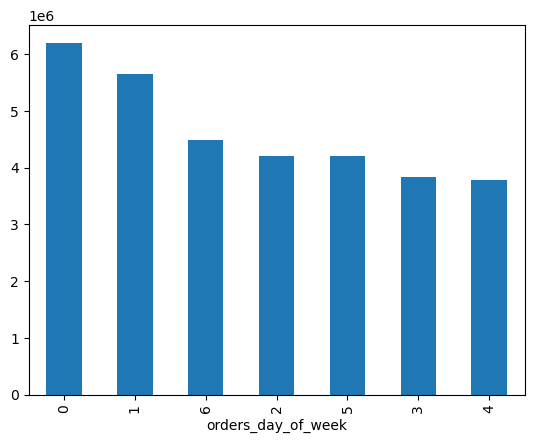

In [4]:
# Create bar chart
all['orders_day_of_week'].value_counts().plot.bar()

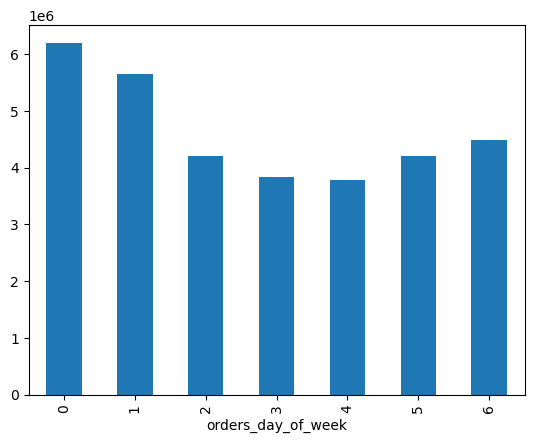

In [5]:
bar = all['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
# Save bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


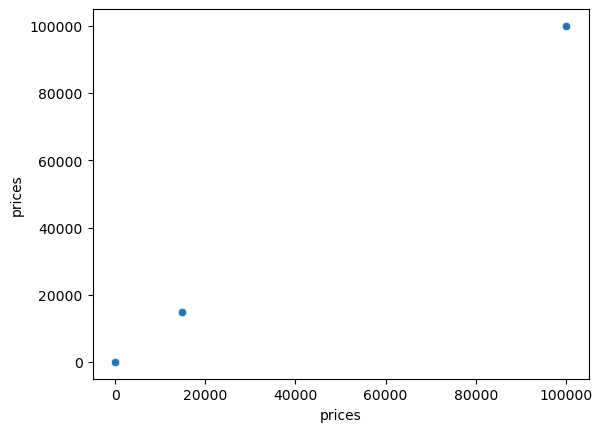

In [7]:
# Create scatterplot
scatter = sns.scatterplot(x = 'prices', y = 'prices',data = all)

In [8]:
all['prices'].loc[all['prices'] > 100]

7805        14900.0
7806        14900.0
15143       14900.0
20264       99999.0
20497       14900.0
             ...   
32303799    99999.0
32307882    99999.0
32310810    99999.0
32330048    99999.0
32330049    99999.0
Name: prices, Length: 5127, dtype: float64

In [9]:
all.loc[all['prices'] >100, 'prices'] = np.nan

In [10]:
all['prices'].max()

25.0

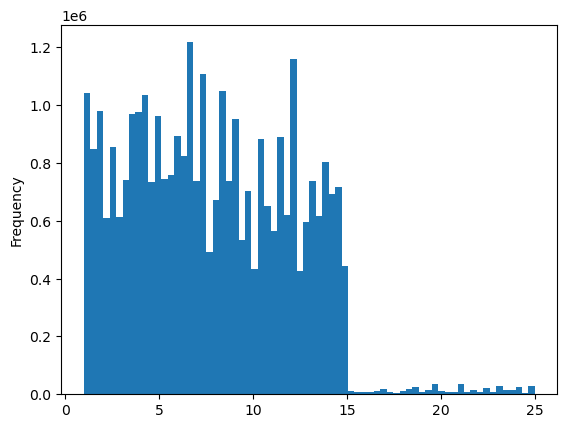

In [11]:
hist = all['prices'].plot.hist(bins = 70)

In [12]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_dow.png'))

In [13]:
df = all[:2000000]

In [14]:
np.random.seed(4)
dev = np.random.rand(len(all)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
big = all[dev]
small = all[~dev]

In [17]:
len(big)

22683761

In [18]:
len(small)

9721098

In [19]:
len(big)/(len(big)+len(small))

0.7000111001871664

In [20]:
df_2 = small[['orders_day_of_week','prices']]

/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

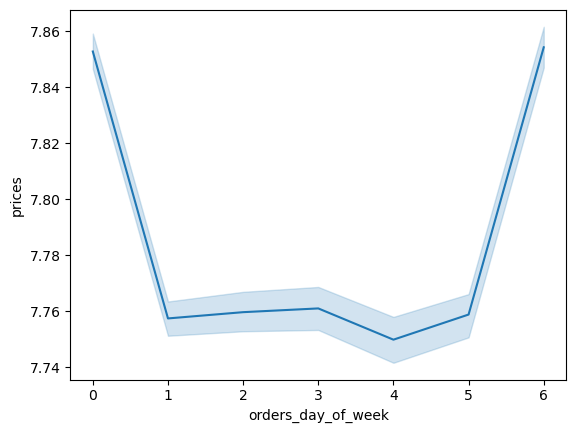

In [21]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [22]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dow_prices.png'))

### Descriptive Findings About Sales

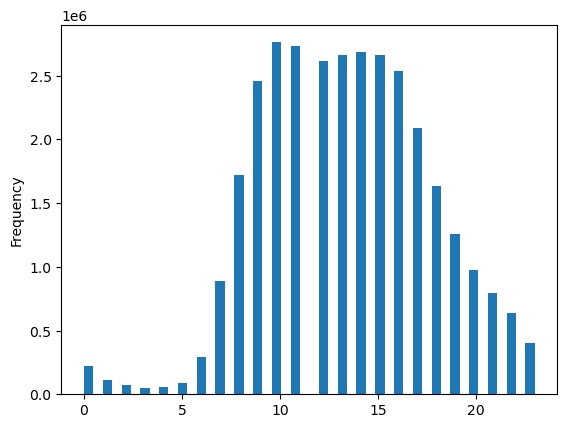

In [23]:
# Create a histogram of the 'order_hour_of_day' 
hist_2 = all['order_hour_of_day'].plot.hist(bins = 48)

The histogram displays the busiest hours of the day for Instacart. You can see that they receive the bulk of their orders between 9 a.m. and 4 p.m.

In [24]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist2_hod.png'))

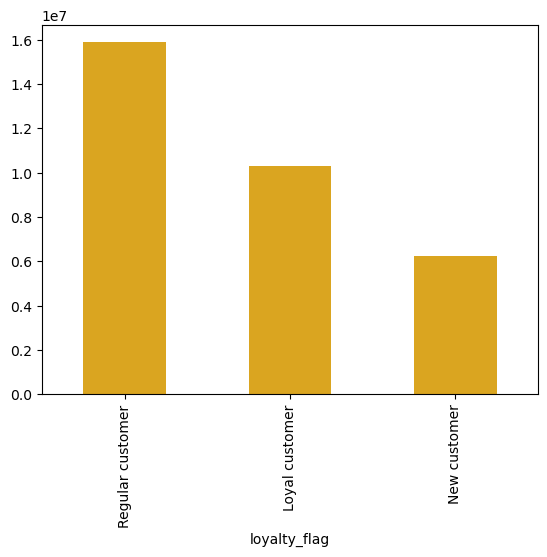

In [25]:
# Create a bar chart from the 'loyalty_flag' column
bar_2 = all['loyalty_flag'].value_counts().plot.bar(color = {'goldenrod'})

In [26]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar2_loyalty.png'))

/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

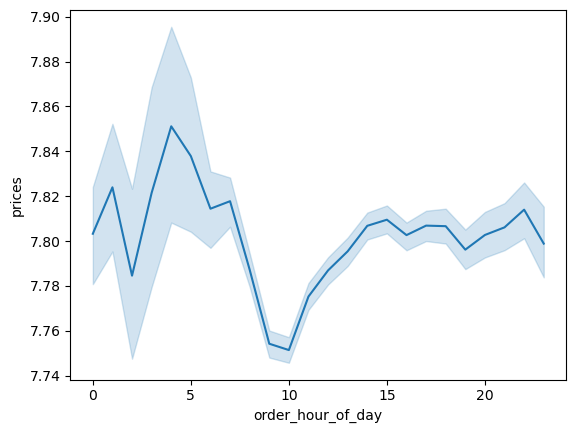

In [27]:
# Compare expenditure and time of day
line_2 = sns.lineplot(data = big, x = 'order_hour_of_day', y = 'prices')

In [28]:
# Save line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line2_hod_price.png'))

/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

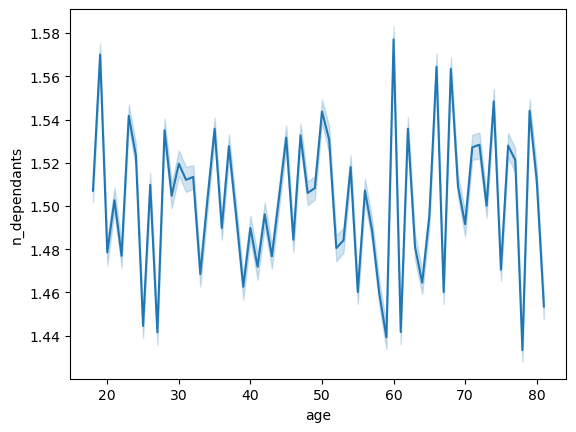

In [29]:
# Exploratory Analysis on age and number of dependents
line_3 = sns.lineplot(data = small, x = 'age', y = 'n_dependants')

Does not appear to be a relationship between age and number of dependents according to the data.

In [30]:
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line3_age_dep.png'))

/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


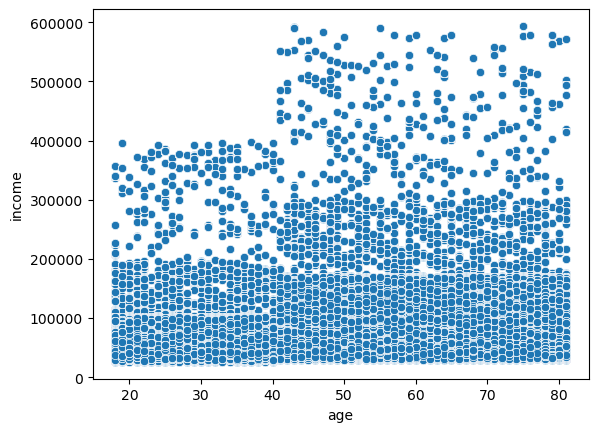

In [31]:
# Scatterplot to explore the relationship between age and spending power (income)
scatter_2 = sns.scatterplot(data = small, x = 'age', y = 'income')

There is little to no relationship between age and spending power. It has a weak positive correlation, where as the age increases, the spending power increases. 

In [32]:
scatter_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter2_age_income.png'))

In [33]:
# Export Data
all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))